# PROJECT  : Iris Flower Classification

In [1]:
import pandas as pd
df=pd.read_csv('iris dataset.csv',header=None)
df.columns=['PL','PW','SL','SW','Target']
print(df.shape)
print(df.head())

(150, 5)
    PL   PW   SL   SW       Target
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [2]:
#step-1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PL      150 non-null    float64
 1   PW      150 non-null    float64
 2   SL      150 non-null    float64
 3   SW      150 non-null    float64
 4   Target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df['Target'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Target, dtype: int64

In [7]:
dict={'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2}
df1=df
df1['Target']=df1['Target'].map(dict)
df1['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [13]:
from sklearn.datasets import load_iris
data=load_iris()
x=data.data
y=data.target
print(x.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print((y==0).sum())

50


In [14]:
import numpy as np
print(np.unique(y))

[0 1 2]


In [15]:
####### TRAIN_TEST_SPLIT

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)   # 30% of data goes for testing and remaining to train
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(150, 4)
(105, 4)
(45, 4)


In [25]:
#MODEL


In [26]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train,y_train)
y_test_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)

In [27]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.8952380952380953
Testing Acc= 0.8


In [28]:
print((y_test!=y_test_pred).sum())

9


In [30]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67        18
           2       0.61      1.00      0.76        11

    accuracy                           0.80        45
   macro avg       0.83      0.83      0.79        45
weighted avg       0.87      0.80      0.79        45



In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
print(cm)

[[16  0  0]
 [ 2  9  7]
 [ 0  0 11]]


<AxesSubplot:>

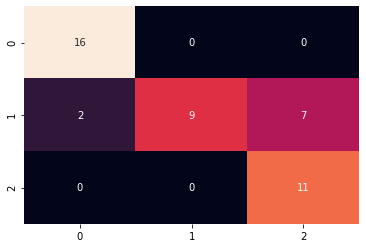

In [32]:
import seaborn as sns
sns.heatmap(cm,annot=True,cbar=False)

In [33]:
#MODEL 2 
    
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(x_train,y_train)
y_test_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.9809523809523809
Testing Acc= 0.9777777777777777


C:\Users\shubhangi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#MODEL 3

from sklearn.svm import SVC
clf= SVC()
clf.fit(x_train,y_train)
y_test_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.9714285714285714
Testing Acc= 0.9777777777777777


In [37]:
#MODEL 4

from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier
clf.fit(x_train,y_train)
y_test_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.9714285714285714
Testing Acc= 0.9777777777777777


In [45]:
#####  Compare the performance of different classifier

from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier


clf1=Perceptron()
clf2=LogisticRegression()
clf3=SVC()
clf4=KNeighborsClassifier()
clf5=GaussianNB()
clf6=DecisionTreeClassifier()
clf7=RandomForestClassifier()
clf8=BaggingClassifier()
clf9=ExtraTreesClassifier()
clf10=AdaBoostClassifier()
clf11=GradientBoostingClassifier()
clf12=VotingClassifier(estimators=[(clf1,'per',clf),('dt',clf6),('ada',clf10)],voting='hard')

clf=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12]
name=['Per','LR','SVC','KNN','DT','RF','BAG','ET','ADA','GBC','VT']
accuracy={}
for model,model_name in zip(clf,name):
    model.fit(x_train,y_train)
    acc=accuracy_score(model.predict(x_test),y_test)
    accuracy[model_name]=acc
print(accuracy)
for i,j in accuracy.items():
    print(i,':',j)



C:\Users\shubhangi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Per': 0.8, 'LR': 0.9777777777777777, 'SVC': 0.9777777777777777, 'KNN': 0.9777777777777777, 'DT': 1.0, 'RF': 0.9777777777777777, 'BAG': 0.9777777777777777, 'ET': 0.9777777777777777, 'ADA': 0.9777777777777777, 'GBC': 0.9111111111111111, 'VT': 0.9777777777777777}
Per : 0.8
LR : 0.9777777777777777
SVC : 0.9777777777777777
KNN : 0.9777777777777777
DT : 1.0
RF : 0.9777777777777777
BAG : 0.9777777777777777
ET : 0.9777777777777777
ADA : 0.9777777777777777
GBC : 0.9111111111111111
VT : 0.9777777777777777
